EXPLORATORY DATA ANALYSIS (EDA)

Steps for EDA
1. Overview of the Dataset: Display the first few rows and summary statistics.
2. Check for Missing Values: Identify any missing data points.
3. Visualize Distribution of Features: Use histograms and box plots.
4. Analyze Correlation: Check how features correlate with churn.

In [5]:
import pandas as pd

# Load the synthetic dataset
safaricom_data = pd.read_csv('Safaricom_churn_data.csv')  

safaricom_data.head()

,Customer ID,Age,Gender,Tenure (Years),Region,Monthly Data Usage (MB),Call Duration (Minutes),SMS Sent,M-Pesa Transactions,Customer Service Interactions,...,Third Last Month Call Duration (Minutes),Last Month SMS Sent,Second Last Month SMS Sent,Third Last Month SMS Sent,Promotions,Payment Method,Data Rate per MB,Call Rate per Minute,SMS Rate per Message,Churn History
0,CUST0001,56,Male,2,Mombasa,6768,434,107,35,9,...,440,37,335,92,1,Credit Card,0.05,0.02,0.01,1
1,CUST0002,69,Male,10,Mombasa,1410,383,331,17,8,...,946,42,145,459,5,Credit Card,0.05,0.02,0.01,0
2,CUST0003,46,Female,9,Nakuru,4840,559,422,89,9,...,780,116,309,64,1,Debit Card,0.05,0.02,0.01,0
3,CUST0004,32,Female,8,Nakuru,4509,193,89,180,9,...,895,404,126,320,4,Mobile Money,0.05,0.02,0.01,0
4,CUST0005,60,Female,9,Nairobi,7128,735,204,198,0,...,919,474,174,9,5,Mobile Money,0.05,0.02,0.01,0


DATA PREPROCESSING

In [7]:
# Check for missing values
print(safaricom_data.isnull().sum())

# Convert categorical variables to numeric
safaricom_data['Gender'] = safaricom_data['Gender'].map({'Male': 0, 'Female': 1})
saf_data = pd.get_dummies(safaricom_data, columns=['Customer ID', 'Region', 'Subscription Type', 'Payment Method'], drop_first=True)

Customer ID                                  0
Age                                          0
Gender                                       0
Tenure (Years)                               0
Region                                       0
Monthly Data Usage (MB)                      0
Call Duration (Minutes)                      0
SMS Sent                                     0
M-Pesa Transactions                          0
Customer Service Interactions                0
Subscription Type                            0
Churn Indicator                              0
Last Month Data Usage (MB)                   0
Second Last Month Data Usage (MB)            0
Third Last Month Data Usage (MB)             0
Last Month Call Duration (Minutes)           0
Second Last Month Call Duration (Minutes)    0
Third Last Month Call Duration (Minutes)     0
Last Month SMS Sent                          0
Second Last Month SMS Sent                   0
Third Last Month SMS Sent                    0
Promotions   

In [8]:
# Verify the changes
saf_data.head()

,Age,Gender,Tenure (Years),Monthly Data Usage (MB),Call Duration (Minutes),SMS Sent,M-Pesa Transactions,Customer Service Interactions,Churn Indicator,Last Month Data Usage (MB),...,Customer ID_CUST0998,Customer ID_CUST0999,Customer ID_CUST1000,Region_Mombasa,Region_Nairobi,Region_Nakuru,Subscription Type_Prepaid,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Mobile Money
0,56,0,2,6768,434,107,35,9,0,5702,...,False,False,False,True,False,False,True,True,False,False
1,69,0,10,1410,383,331,17,8,0,5844,...,False,False,False,True,False,False,True,True,False,False
2,46,1,9,4840,559,422,89,9,0,5007,...,False,False,False,False,False,True,True,False,True,False
3,32,1,8,4509,193,89,180,9,0,5330,...,False,False,False,False,False,True,False,False,False,True
4,60,1,9,7128,735,204,198,0,0,617,...,False,False,False,False,True,False,True,False,False,True


EXPLORATORY DATA ANALYSIS

Summary statistics

In [11]:
safaricom_data.describe()

,Age,Gender,Tenure (Years),Monthly Data Usage (MB),Call Duration (Minutes),SMS Sent,M-Pesa Transactions,Customer Service Interactions,Churn Indicator,Last Month Data Usage (MB),...,Second Last Month Call Duration (Minutes),Third Last Month Call Duration (Minutes),Last Month SMS Sent,Second Last Month SMS Sent,Third Last Month SMS Sent,Promotions,Data Rate per MB,Call Rate per Minute,SMS Rate per Message,Churn History
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,44.385000,0.476000,5.464000,5242.859000,512.766000,256.862000,101.866000,5.013000,0.204000,5133.917000,...,508.122000,503.662000,247.983000,253.297000,248.117000,2.490000,5.000000e-02,2.000000e-02,1.000000e-02,0.478000
std,15.321669,0.499674,2.858474,2691.611011,292.605631,144.172607,57.558153,3.113603,0.403171,2750.581867,...,289.223857,287.037845,141.939817,147.074599,144.732494,1.733466,7.081213e-16,3.367047e-16,1.683524e-16,0.499766
min,18.000000,0.000000,1.000000,518.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000e-02,2.000000e-02,1.000000e-02,0.000000
25%,31.750000,0.000000,3.000000,2966.250000,249.000000,133.500000,55.000000,2.000000,0.000000,2771.750000,...,261.750000,258.000000,130.000000,127.750000,124.000000,1.000000,5.000000e-02,2.000000e-02,1.000000e-02,0.000000
50%,45.000000,0.000000,5.000000,5163.500000,505.500000,266.000000,101.500000,5.000000,0.000000,5005.000000,...,512.000000,505.000000,249.000000,260.000000,244.000000,2.000000,5.000000e-02,2.000000e-02,1.000000e-02,0.000000
75%,57.000000,1.000000,8.000000,7629.250000,778.250000,383.000000,152.000000,8.000000,0.000000,7514.500000,...,765.250000,756.000000,368.000000,381.000000,379.000000,4.000000,5.000000e-02,2.000000e-02,1.000000e-02,1.000000
max,70.000000,1.000000,10.000000,9996.000000,1000.000000,500.000000,200.000000,10.000000,1.000000,9976.000000,...,1000.000000,998.000000,500.000000,500.000000,499.000000,5.000000,5.000000e-02,2.000000e-02,1.000000e-02,1.000000


Explore the data to understand trends and relationships related to churn.

1. Visualize Churn Distribution

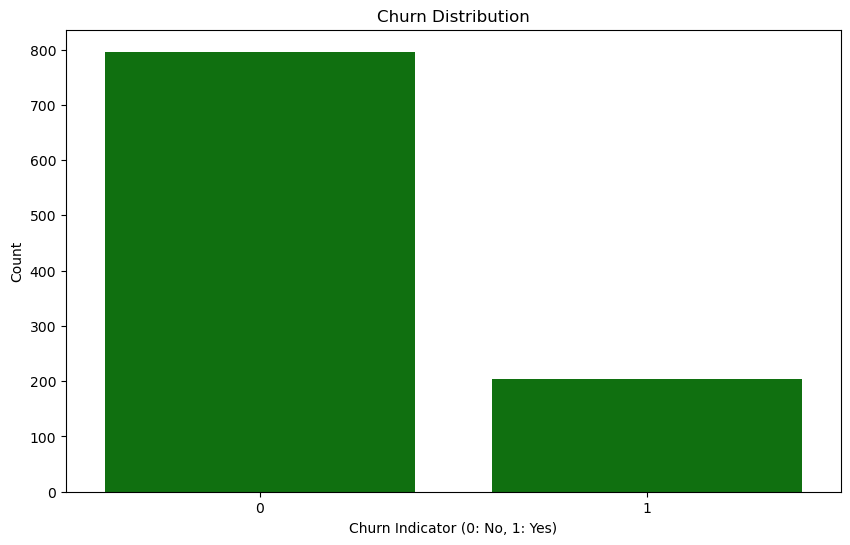

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Indicator', data=safaricom_data, color='green')
plt.title('Churn Distribution')
plt.xlabel('Churn Indicator (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

2. Visualize Churn Rate by Age
   
How churn rates differ with age.

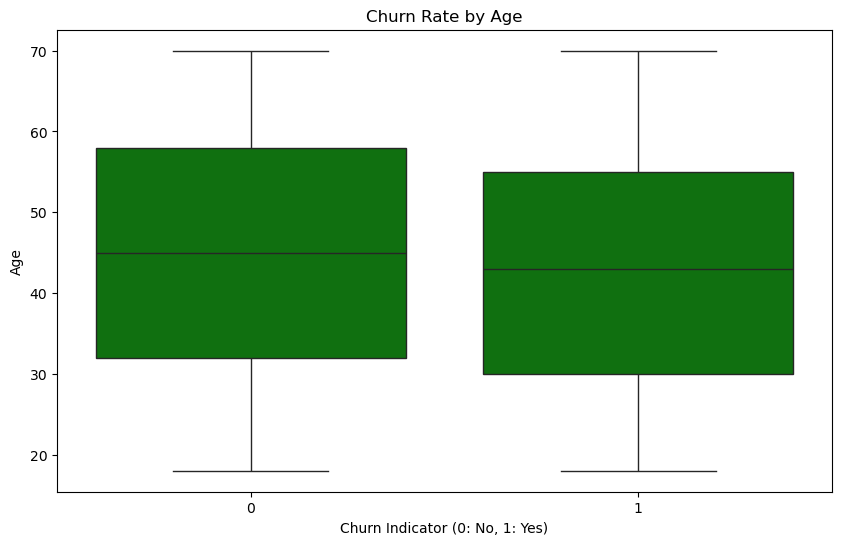

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Indicator', y='Age', data=safaricom_data, color='green')
plt.title('Churn Rate by Age')
plt.xlabel('Churn Indicator (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

3. Visualize Churn Rate by Monthly Data Usage

   Analyze the relationship between monthly data usage and churn.

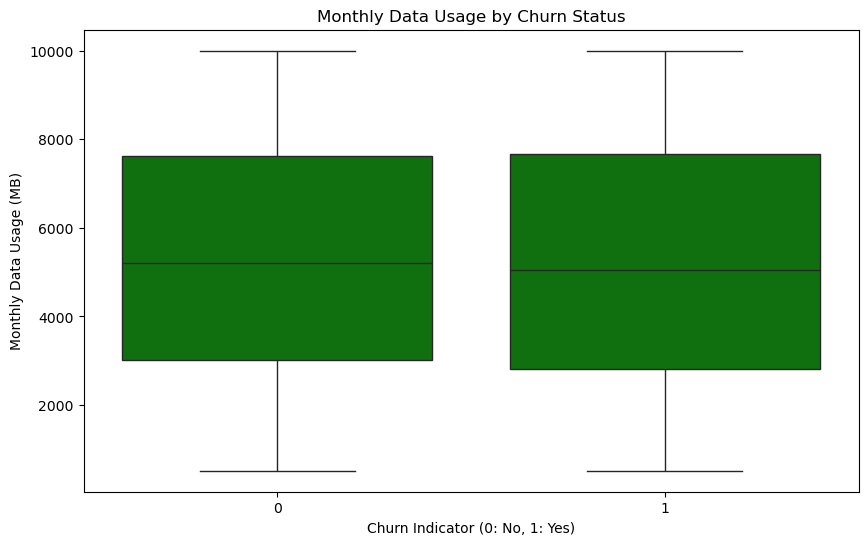

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Indicator', y='Monthly Data Usage (MB)', data=safaricom_data, color='green')
plt.title('Monthly Data Usage by Churn Status')
plt.xlabel('Churn Indicator (0: No, 1: Yes)')
plt.ylabel('Monthly Data Usage (MB)')
plt.show()

4. Correlation Heatmap

Visualize the correlation between features to identify strong relationships.

In [20]:
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(saf_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = saf_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
